***The CIFAR-10 dataset***
In this notebook, we will work on the CIFAR-10 dataset collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton from the University of Toronto. This dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. Each image is a 3-channel colour images of 32x32 pixels in size. There are 50000 training images and 10000 test images.

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
torch.manual_seed(20201214)
np.random.seed(20201214)

# 1a.Download both the training and test data of the CIFAR-10 dataset

by following the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
#Load the training data
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=len(trainset),#Load entire trainset
                                          shuffle=True, num_workers=2)
#Load the test data
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset), #Load entire testset
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck') 

Files already downloaded and verified
Files already downloaded and verified


In [4]:
#Preprocessing
#trainset #convert tensor data(image, label) into numpy array
train_dataset_array, train_dataset_targets =  next(iter(trainloader)) #get a single batch from a trainloader
train_dataset_array = train_dataset_array.numpy()
train_dataset_targets = train_dataset_targets.numpy()

#testset #convert tensor data(label) into numpy array
test_dataset_array, test_dataset_targets =  next(iter(testloader))
test_dataset_array = test_dataset_array.numpy()
test_dataset_targets = test_dataset_targets.numpy()

# 1b.Add random noise to all training and test data 

In [5]:
scale = 0.3 #between 0.2 and 0.5
train_shape = train_dataset_array.shape #(50000, 3, 32, 32)
train_noise = np.clip(train_dataset_array + scale*torch.randn(train_shape).numpy(), a_min=-1, a_max=1) #add noise to traindata

test_shape = test_dataset_array.shape #(10000, 3, 32, 32)
test_noise = np.clip(test_dataset_array + scale*torch.randn(test_shape).numpy(), a_min=-1, a_max=1) #add noise to testdata

# 1c.Extract a subset with only two classes: Cat(3), Dog(5) and name it starting with CatDog

In [6]:
cat_dog_train = train_dataset_array[np.where((train_dataset_targets == 3) | (train_dataset_targets == 5))]
cat_dog_train_noise = train_noise[np.where((train_dataset_targets == 3) | (train_dataset_targets == 5))]
cat_dog_train_targets = train_dataset_targets[np.where((train_dataset_targets == 3) | (train_dataset_targets == 5))]

cat_dog_test = test_dataset_array[np.where((test_dataset_targets == 3) | (test_dataset_targets == 5))]
cat_dog_test_noise =  test_noise[np.where((test_dataset_targets == 3) | (test_dataset_targets == 5))]
cat_dog_test_targets = test_dataset_targets[np.where((test_dataset_targets == 3) | (test_dataset_targets == 5))]

In [7]:
# Define function to display the images 
def imshow(img):
    img = img / 2 + 0.5     # unnormalize back to range [0, 1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) #rearrange dimensions to numpy format for disply
    plt.show()

# 1d.Show 10 pairs of original and noisy images of cats

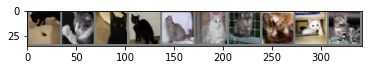

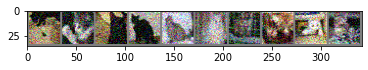

In [8]:
imshow(torchvision.utils.make_grid(torch.from_numpy(cat_dog_train[np.where(cat_dog_train_targets == 3)][:10]), nrow=10))
imshow(torchvision.utils.make_grid(torch.from_numpy(cat_dog_train_noise[np.where(cat_dog_train_targets == 3)][:10]), nrow=10))

# 1d.and 10 pairs of original and noisy images of dogs.

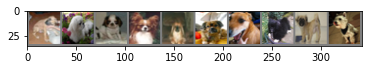

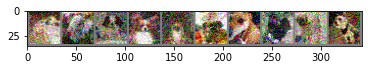

In [9]:
imshow(torchvision.utils.make_grid(torch.from_numpy(cat_dog_train[np.where(cat_dog_train_targets == 5)][:10]), nrow=10))
imshow(torchvision.utils.make_grid(torch.from_numpy(cat_dog_train_noise[np.where(cat_dog_train_targets == 5)][:10]), nrow=10))